In [1]:
!mkdir -p results results/double_dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_space_invaders

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('SpaceInvadersDeterministic-v4')
env = Monitor(env, './monitor/double_dqn/space_invaders', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_space_invaders, 
    replay_memory_size=0,
    render_mode='rgb_array'
)
agent.model.load_weights('./models/double_dqn/space_invaders.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<SpaceInvadersDeterministic-v4>>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x114142f98>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x1220ba0d0>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [08:34<00:00,  5.14s/game]


0     19.0
1     30.0
2     33.0
3     32.0
4     30.0
5     21.0
6     34.0
7     31.0
8     29.0
9     34.0
10    29.0
11    29.0
12    25.0
13    24.0
14    27.0
15    23.0
16    29.0
17    13.0
18    24.0
19    44.0
20    27.0
21    23.0
22    30.0
23    16.0
24    47.0
25    29.0
26    26.0
27    21.0
28    27.0
29    31.0
      ... 
70    28.0
71    34.0
72    32.0
73    26.0
74    23.0
75    20.0
76    31.0
77    28.0
78    44.0
79    33.0
80    28.0
81    17.0
82    23.0
83    27.0
84    20.0
85    33.0
86    27.0
87    17.0
88    30.0
89    19.0
90    22.0
91    31.0
92    31.0
93    22.0
94    20.0
95    24.0
96    43.0
97    33.0
98    26.0
99    33.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/double_dqn/fully-deterministic.csv')

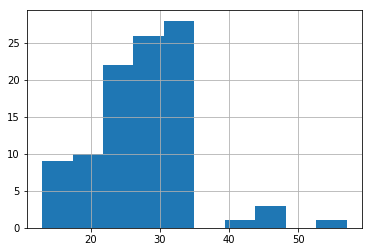

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean      27.480000
std        7.088873
min       13.000000
25%       23.000000
50%       28.000000
75%       31.000000
max       57.000000
dtype: float64